In [1]:
# pandasをインポート
import pandas as pd

# マスタデータをインポート
customer_master = pd.read_csv('customer_master.csv')
item_master = pd.read_csv('item_master.csv')

In [2]:
# マスタデータの中身を確認
print("顧客マスタ")
display(customer_master.head())
print("商品マスタ")
display(item_master.head())

顧客マスタ


,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


商品マスタ


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [3]:
# 取引履歴をそれぞれ結合して、データフレームに
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_2 = pd.read_csv('transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
print("取引履歴")
transaction.head()

取引履歴


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [4]:
# 取引詳細をそれぞれ結合して、データフレームに
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
print("詳細履歴")
transaction_detail.head()

詳細履歴


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


# 詳細履歴と商品マスタを結合して、自分で分析してみる

In [5]:
join_data1 = pd.merge(transaction_detail, item_master, on="item_id", how="left")
join_data1.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price
0,0,T0000000113,S005,1,PC-E,210000
1,1,T0000000114,S001,1,PC-A,50000
2,2,T0000000115,S003,1,PC-C,120000
3,3,T0000000116,S005,1,PC-E,210000
4,4,T0000000117,S002,2,PC-B,85000


In [6]:
# 金額の合計列を追加する
join_data1["price"] = join_data1["quantity"] * join_data1["item_price"]
join_data1.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price
0,0,T0000000113,S005,1,PC-E,210000,210000
1,1,T0000000114,S001,1,PC-A,50000,50000
2,2,T0000000115,S003,1,PC-C,120000,120000
3,3,T0000000116,S005,1,PC-E,210000,210000
4,4,T0000000117,S002,2,PC-B,85000,170000


In [7]:
# 商品ごとの売上を集計する
join_data1.groupby("item_name")["price"].sum()

,price
item_name,
PC-A,152150000
PC-B,151725000
PC-C,122640000
PC-D,162000000
PC-E,382620000


<Axes: xlabel='item_name'>

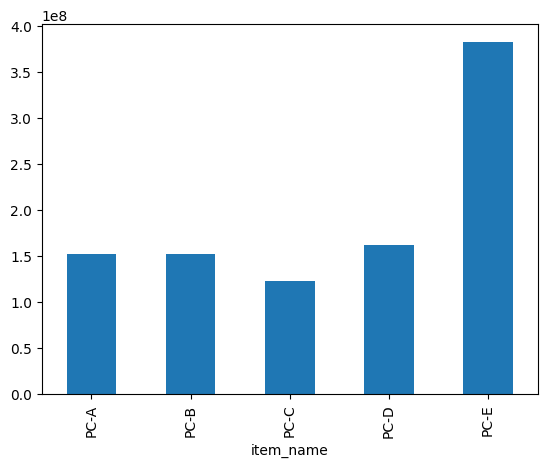

In [8]:
# 縦棒グラフで可視化
# pandasの標準機能でこんなこともできる（これで十分では..）
join_data1.groupby("item_name")["price"].sum().plot(kind="bar")

<Axes: ylabel='item_name'>

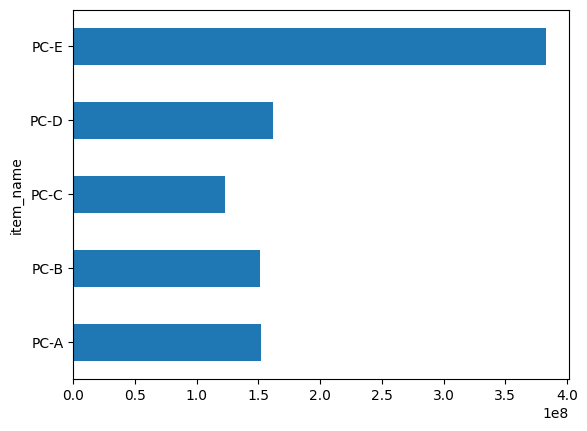

In [11]:
# 横棒グラフにする
join_data1.groupby("item_name")["price"].sum().plot(kind="barh")

# join_data1に対して、日付の情報も加えて分析する

In [12]:
join_data1.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price
0,0,T0000000113,S005,1,PC-E,210000,210000
1,1,T0000000114,S001,1,PC-A,50000,50000
2,2,T0000000115,S003,1,PC-C,120000,120000
3,3,T0000000116,S005,1,PC-E,210000,210000
4,4,T0000000117,S002,2,PC-B,85000,170000


In [13]:
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [14]:
# transaction_idで結合する
join_data2 = pd.merge(join_data1, transaction, on="transaction_id", how="left")
join_data2.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price_x,price_y,payment_date,customer_id
0,0,T0000000113,S005,1,PC-E,210000,210000,210000,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,PC-A,50000,50000,50000,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,PC-C,120000,120000,120000,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,PC-E,210000,210000,210000,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,PC-B,85000,170000,170000,2019-02-01 04:33:46,PL542865


In [17]:
# 不要な列を消す
join_data2 = join_data2.drop(columns=['price_y', 'customer_id'])
join_data2.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price_x,payment_date
0,0,T0000000113,S005,1,PC-E,210000,210000,2019-02-01 01:36:57
1,1,T0000000114,S001,1,PC-A,50000,50000,2019-02-01 01:37:23
2,2,T0000000115,S003,1,PC-C,120000,120000,2019-02-01 02:34:19
3,3,T0000000116,S005,1,PC-E,210000,210000,2019-02-01 02:47:23
4,4,T0000000117,S002,2,PC-B,85000,170000,2019-02-01 04:33:46


In [18]:
join_data2['payment_date'].dtype

dtype('O')

In [19]:
join_data2.dtypes

,0
detail_id,int64
transaction_id,object
item_id,object
quantity,int64
item_name,object
item_price,int64
price_x,int64
payment_date,object


In [20]:
# 日付型に変換する
join_data2['payment_date'] = pd.to_datetime(join_data2['payment_date'])
join_data2.dtypes

,0
detail_id,int64
transaction_id,object
item_id,object
quantity,int64
item_name,object
item_price,int64
price_x,int64
payment_date,datetime64[ns]
